<a href="https://colab.research.google.com/github/wanjas1/Clustering-Wikipedia-Text-Data-A-Comparative-Analysis-of-K-Means-and-Hierarchical-Clustering/blob/main/Clustering_Wikipedia_Text_Data_A_Comparative_Analysis_of_K_Means_and_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title Full Name { run: "auto" }
Name = 'Sharomith Wanja' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: Sharomith Wanja


# **Clustering Wikipedia Text Data: A Comparative Analysis of K-Means and Hierarchical Clustering**

**Project Overview**

This project explores text clustering techniques using web-based content retrieved from Wikipedia. The dataset consists of 40 Wikipedia pages categorized into four general topics: artificial intelligence, sports, college majors/courses, and animals. The goal is to apply unsupervised machine learning methods to analyze the underlying structure of the textual data and evaluate how well clustering techniques can organize documents into their expected topical groups.

## Prerequisite Code

In [1]:
!pip install wikipedia
import wikipedia
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=fc803bbe54ae7ef997ddbcade552d3114eb066f55a0635c181cc5ab8d2ee73bb
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia




---




1.  First, create the topics object. Then, develop a dataset containing the content from the respective Wikipedia pages and prepare the TF-IDF-weighted Document Term Matrix.


In [2]:
topics = ['data science','business analytics', 'artificial intelligence','computational statistics', 'linguistics', 'expert systems', 'natural language processing', 'motion analysis', 'basketball', 'swimming','diving', 'baseball', 'football', 'soccer', 'hockey', 'gymnastics', 'lacrosse', 'operations management', 'marketing', 'economics', 'mathematics', 'biology', 'chemistry', 'statistics', 'computer science', 'engineering', 'zebra', 'dolphin', 'whale', 'horse', 'sheep', 'monkey', 'kangaroo', 'leopard', 'tiger', 'wolf', 'snake', 'frog', 'hedgehog']

In [3]:
# initialize the list
wiki_lst=[]

# Iterage through the list of topics, retrieve Wiki pages corresponding to each
# and add them to a list
for topic in topics:
   print("retrieving: ", topic)
   wiki_lst.append(wikipedia.page(topic).content)

retrieving:  data science
retrieving:  business analytics
retrieving:  artificial intelligence
retrieving:  computational statistics
retrieving:  linguistics
retrieving:  expert systems
retrieving:  natural language processing
retrieving:  motion analysis
retrieving:  basketball
retrieving:  swimming
retrieving:  diving
retrieving:  baseball
retrieving:  football
retrieving:  soccer
retrieving:  hockey
retrieving:  gymnastics
retrieving:  lacrosse
retrieving:  operations management
retrieving:  marketing
retrieving:  economics
retrieving:  mathematics
retrieving:  biology
retrieving:  chemistry
retrieving:  statistics
retrieving:  computer science
retrieving:  engineering
retrieving:  zebra
retrieving:  dolphin
retrieving:  whale
retrieving:  horse
retrieving:  sheep
retrieving:  monkey
retrieving:  kangaroo
retrieving:  leopard
retrieving:  tiger
retrieving:  wolf
retrieving:  snake
retrieving:  frog
retrieving:  hedgehog




---

<br>

2. Perform elbow analysis on the TF-IDF vectorized dataset. In your plot, consider a minimum of 2 clusters and a maximum of 15 clusters. For reproducible results, set the `random_state` argument in `KMeans()` to 123.

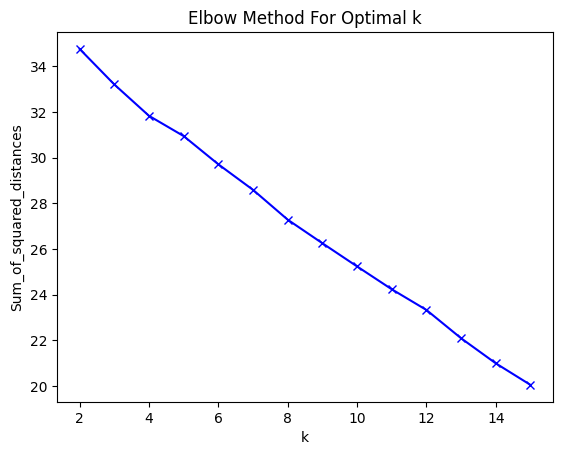

In [4]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(wiki_lst)

Sum_of_squared_distances = []
K = range(2,16)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=123)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on this plot, there isn’t a distinct elbow point that indicates an optimal value for k, making it difficult to determine an ideal number of clusters.

Typically, k would be marked by a clear elbow to show that additional clusters can no longer reduce the sum of squared distances.In this case, the plot shows a steady decline without a noticeable elbow, suggesting that the text data in these Wikipedia pages may have overlapping features across categories, making them harder to group into distinct clusters solely based on TF-IDF features.

Additionally, since we do not have a pronounced elbow point at k=4, this result does not align with the expected clustering of 4 general topic groups (artificial intelligence, sports, college courses/majors, and animals).

<hr>
<br>

3. Develop a KMeans clustering solution using the expected number of groups as k.

In [5]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=123)
model.fit(X)


labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(topics,labels)),columns=['topics','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         topics  cluster
0                  data science        0
3      computational statistics        0
6   natural language processing        0
24             computer science        0
23                   statistics        0
20                  mathematics        0
35                         wolf        1
31                       monkey        1
29                        horse        1
26                        zebra        1
25                  engineering        1
22                    chemistry        1
21                      biology        1
18                    marketing        1
17        operations management        1
19                    economics        1
2       artificial intelligence        1
4                   linguistics        1
1            business analytics        1
10                       diving        1
9                      swimming        1
5                expert systems        1
7               motion analysis        1
16              

The KMeans clustering solution does not fully align with the expected cluster memberships for the documents. This is because we anticipated that the documents would naturally cluster into four distinct groups corresponding to the four general topics. However, the results revealed some overlap between categories.

For instance, documents related to animals, such as 'leopard', are grouped together with sports-related topics like 'hockey' within cluster 2. Similarly, certain course majors such as 'business analytics' which we would expect to cluster separately are instead grouped with unrelated topics such as 'diving' in cluster 1.

<hr>

*4*. Next, we perform hierachical clustering. By default, `AgglomerativeClustering()` sets k = 2 (`n_clusters = 2`). Instead, set the `n_clusters` argument equal to the expected number of clusters.

View cluster membership output as a dataframe.

In [6]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
cluster_labels = agg_clustering.fit_predict(X.toarray())

# Convert the cluster labels to a df
cluster_df = pd.DataFrame({
    'Topic': topics,
    'Cluster': cluster_labels
})

print(cluster_df)

                          Topic  Cluster
0                  data science        2
1            business analytics        0
2       artificial intelligence        0
3      computational statistics        2
4                   linguistics        0
5                expert systems        0
6   natural language processing        0
7               motion analysis        1
8                    basketball        3
9                      swimming        1
10                       diving        1
11                     baseball        3
12                     football        3
13                       soccer        3
14                       hockey        3
15                   gymnastics        1
16                     lacrosse        3
17        operations management        0
18                    marketing        0
19                    economics        0
20                  mathematics        2
21                      biology        1
22                    chemistry        1
23              

**Key Insights**

The clusters created using hierarchical cluster analysis do not align with the expected 4 groups.

For example:

a.)'Biology' which belongs to a course/major is grouped in the same cluster as 'swimming', a sports-related topic.

b.) 'Economics' which is an academic course is clustered together with 'monkey' which is an animal.

These examples suggest that further preprocessing or steps in feature extraction might be needed to achieve better alignment with the expected topic groups.


<hr>